<a href="https://colab.research.google.com/github/subsup98/subsup98/blob/main/%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98%EA%B8%B0(%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0%2C%EC%BC%80%EB%9D%BC%EC%8A%A4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code: IN -ROOM 이미지 분류기

Date: 2022/02/04 (version 1.0)

Comments: YongSub Lim(dydtjqdla98@kyonggi.ac.kr) from Smart MOM&DAD Lab

Description: 501A호 연구실의 문이 열려있는지를 통해 재실 여부 확인 

In [ ]:
#파이썬을 이용한 구글 드라이브 다운 사진을 많이 쓰기 위해서
!pip install gdown

In [ ]:
import os
import zipfile
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
# 파일을 다운 받기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
'/content/drive/MyDrive/train_room'#train 경로
'/content/drive/MyDrive/test_room'#test 경로


'/content/drive/MyDrive/test_room'

In [ ]:
validation_ratio = 1/8  # validation_split 파라미터로 train set과 validation set을 나눌 수 있습니다.

TRAINING_DIR = "/content/drive/MyDrive/train_room" 
datagen = ImageDataGenerator(validation_split=validation_ratio,
                             rescale = 1./255)
train_generator = datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(256,256),  # 모든 이미지의 크기가 256x256로 조정됩니다.
    class_mode='categorical', # 다중 클래스 문제는 class_mode는 ‘categorical’로 지정합니다.
    batch_size=2, # 몇 개의 샘플로 가중치를 갱신할 것인지 지정합니다.
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(256,256),  # 모든 이미지의 크기가 256x256로 조정됩니다.
    class_mode='categorical', # 다중 클래스 문제는 class_mode는 ‘categorical’로 지정합니다.
    batch_size=2, # 몇 개의 샘플로 가중치를 갱신할 것인지 지정합니다.
    subset='validation'
)

TEST_DIR = "/content/drive/MyDrive/test_room"
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(256,256),
    class_mode='categorical',
    batch_size=2
)

'''
OTHERS_TEST_DIR = "/tmp/others_test"
others_test_datagen = ImageDataGenerator(rescale = 1./255)

others_test_generator = others_test_datagen.flow_from_directory(
    OTHERS_TEST_DIR,
    target_size=(256,256),
    class_mode='categorical',
    batch_size=8
)
'''

Found 82 images belonging to 2 classes.
Found 11 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


'\nOTHERS_TEST_DIR = "/tmp/others_test"\nothers_test_datagen = ImageDataGenerator(rescale = 1./255)\n\nothers_test_generator = others_test_datagen.flow_from_directory(\n    OTHERS_TEST_DIR,\n    target_size=(256,256),\n    class_mode=\'categorical\',\n    batch_size=8\n)\n'

In [ ]:
model = tf.keras.models.Sequential([ 
    # 64개의 필터 적용,  kernel_size = (3,3) 는 필터의 크기를 의미합니다.
    # input_shape(가로, 세로, 흑백(=1)or컬러(=3))
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(256, 256, 3)), 
    tf.keras.layers.MaxPooling2D(2, 2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flattn은 3차원 배열(가로,세로,컬러)인 이미지를 1차원 배열로 바꿔줍니다.
    tf.keras.layers.Flatten(),
    # Dropout()는 특정 노드에 학습이 지나치게 몰리는 것을 방지하기 위해 랜덤하게 일부 노드를 꺼줍니다.
    # Dropout을 통해 과적합을 조금 더 효과적으로 회피할 수 있습니다. /  출처: https://snowdeer.github.io/machine-learning/2018/01/10/convolution-neural-network/
    tf.keras.layers.Dropout(0.5),
    # 출력뉴런 수 512개
    tf.keras.layers.Dense(512, activation='relu'),
    # 출력뉴런 수 2개(라벨 개수)
    tf.keras.layers.Dense(2, activation='softmax')
])


model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=8, steps_per_epoch=5, verbose = 1, validation_data = validation_generator, validation_steps=3)
# epochs : 학습 반복 횟수, (batch_size)*(step_per_epoch)=(Training_data)
# steps_per_epoch : 한 epoch에 사용한 스텝 수를 지정합니다
# validation_steps : 한 epoch 종료 시 마다 검증할 때 사용되는 검증 스텝 수를 지정합니다.
# verbose : verbose : 학습 중 출력되는 문구를 설정합니다.
# 0 : 아무 것도 출력하지 않습니다.
# 1 : 훈련의 진행도를 보여주는 진행 막대를 보여줍니다.
# 2 : 미니 배치마다 손실 정보를 출력합니다.   /   출처: https://wikidocs.net/32105


Epoch 1/8
5/5 [==============================] - 5s 867ms/step - loss: 2.5427 - accuracy: 0.3000 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 2/8
5/5 [==============================] - 4s 797ms/step - loss: 0.7021 - accuracy: 0.6000 - val_loss: 0.8172 - val_accuracy: 0.6667
Epoch 3/8
5/5 [==============================] - 4s 804ms/step - loss: 0.7872 - accuracy: 0.6000 - val_loss: 0.6833 - val_accuracy: 0.5000
Epoch 4/8
5/5 [==============================] - 4s 789ms/step - loss: 0.7094 - accuracy: 0.5000 - val_loss: 0.6188 - val_accuracy: 0.5000
Epoch 5/8
5/5 [==============================] - 4s 801ms/step - loss: 6.7282 - accuracy: 0.4000 - val_loss: 0.6325 - val_accuracy: 0.5000
Epoch 6/8
5/5 [==============================] - 4s 786ms/step - loss: 0.6470 - accuracy: 0.7000 - val_loss: 0.5557 - val_accuracy: 1.0000
Epoch 7/8
5/5 [==============================] - 4s 806ms/step - loss: 1.4710 - accuracy: 0.8000 - val_loss: 0.5184 - val_accuracy: 1.0000
Epoch 8/8
5/5 [============

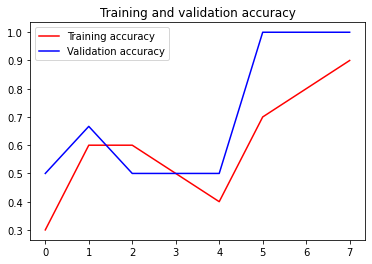

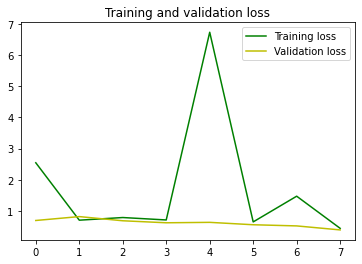

In [ ]:
import matplotlib.pyplot as plt # 결과를 시각화 하기위한 라이브러리
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.legend(loc='best')
plt.title('Training and validation accuracy') 


plt.figure(2)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.legend(loc='best')
plt.title('Training and validation loss') 



plt.show()

In [ ]:
# 훈련된 모델을 test_generator로 평가합니다.
print("-- Evaluate(정확도) --") 
scores = model.evaluate_generator(test_generator, steps=5) 
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate(정확도) --


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


accuracy: 90.00%


Saving KakaoTalk_20220203_174258721_09.jpg to KakaoTalk_20220203_174258721_09.jpg
[[9.830201e-34 1.000000e+00]]


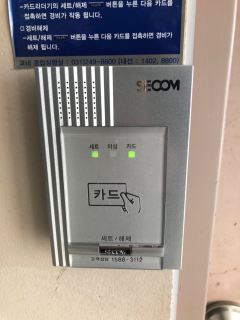

공실 입니다.


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
from google.colab.patches import cv2_imshow
import cv2

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(256, 256))
  image_1 = cv2.imread(fn, cv2.IMREAD_REDUCED_COLOR_4)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=2)
  print(classes)
  if classes[0,0] >= 0.9:
    cv2_imshow(image_1)
    print("재실 입니다")
  else:
    cv2_imshow(image_1)
    print("공실 입니다.")